## Loading Libraries

In [4]:
library(kernlab)
library(randomForest)
library(ellipse)
library(caret)

## Loading dataset

In [5]:
data(iris)
dataset <- iris

## Creating validation dataset

### create a list of 80% of the rows in the original dataset we can use for training

In [6]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

### select 20% of the data for validation

In [7]:
validation <- dataset[-validation_index,]

### use the remaining 80% of data to training and testing the models

In [8]:
dataset <- dataset[validation_index,]

## Summarizing the dataset 

### dimensions of dataset

In [9]:
dim(dataset)

[1] 120   5

### list types for each attribute

In [10]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### take a peek at the first 5 rows of the data

In [11]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### list the levels for the class

In [12]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

### summarize the class distribution

In [13]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


### summarize attribute distributions

In [14]:
summary(dataset)

  Sepal.Length   Sepal.Width     Petal.Length    Petal.Width          Species  
 Min.   :4.30   Min.   :2.000   Min.   :1.100   Min.   :0.100   setosa    :40  
 1st Qu.:5.10   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300   versicolor:40  
 Median :5.80   Median :3.000   Median :4.300   Median :1.300   virginica :40  
 Mean   :5.84   Mean   :3.043   Mean   :3.732   Mean   :1.186                  
 3rd Qu.:6.40   3rd Qu.:3.325   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.90   Max.   :4.400   Max.   :6.900   Max.   :2.500                  

## Visualize Dataset

### Creating Univariate plots

### split input and output

In [15]:
x <- dataset[,1:4]
y <- dataset[,5]

### boxplot for each attribute on one image

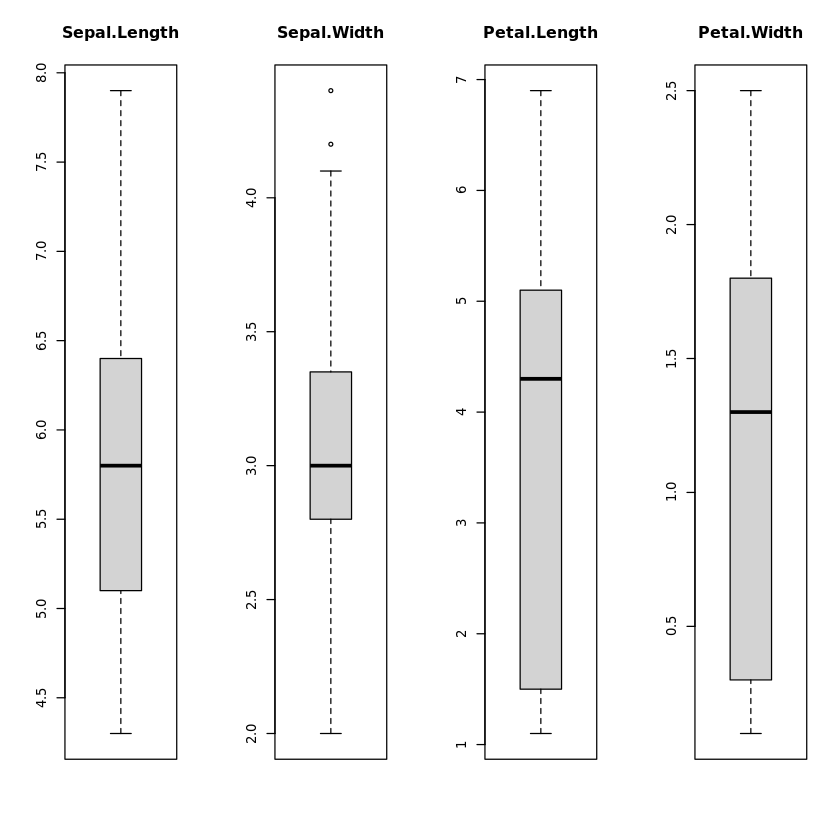

In [16]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

### barplot for class breakdown

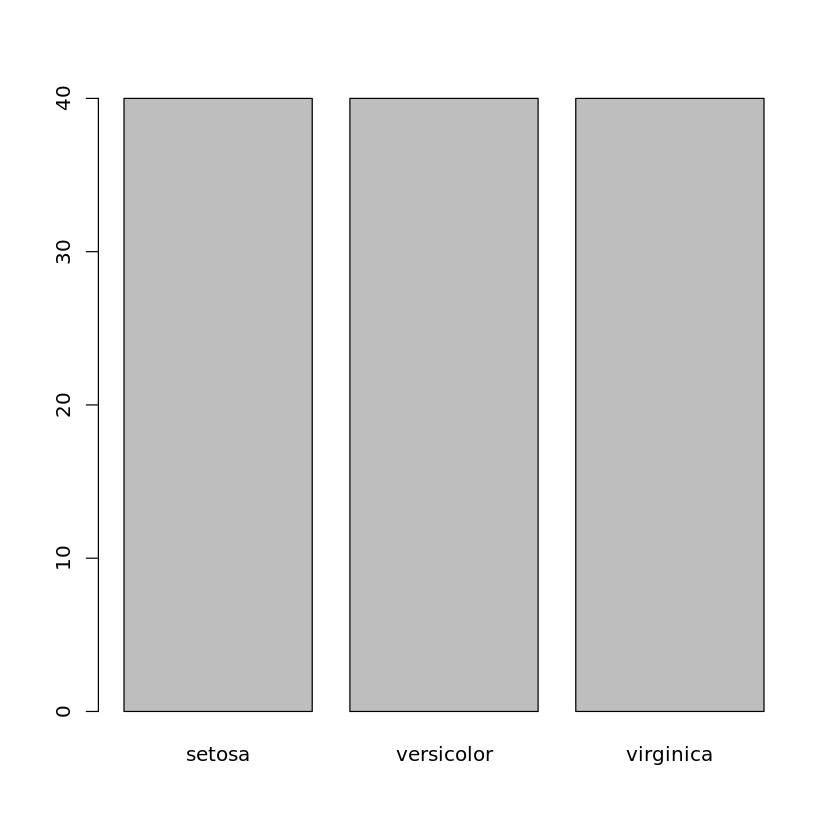

In [17]:
plot(y)

### Creating Multivariate plots

### scatterplot matrix

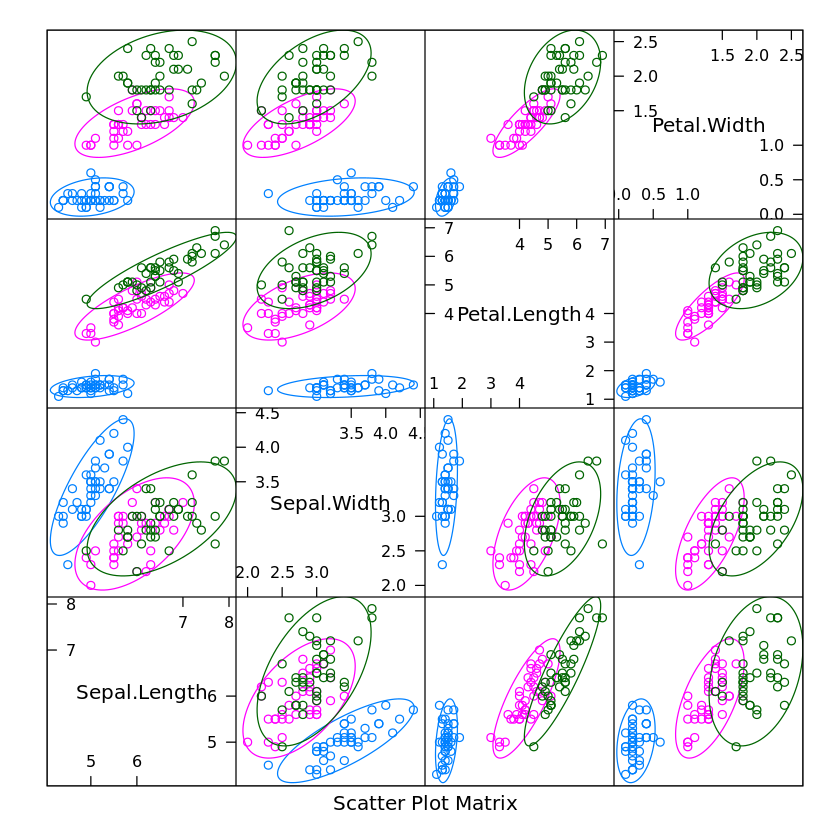

In [18]:
featurePlot(x=x, y=y, plot="ellipse")

### box and whisker plots for each attribute

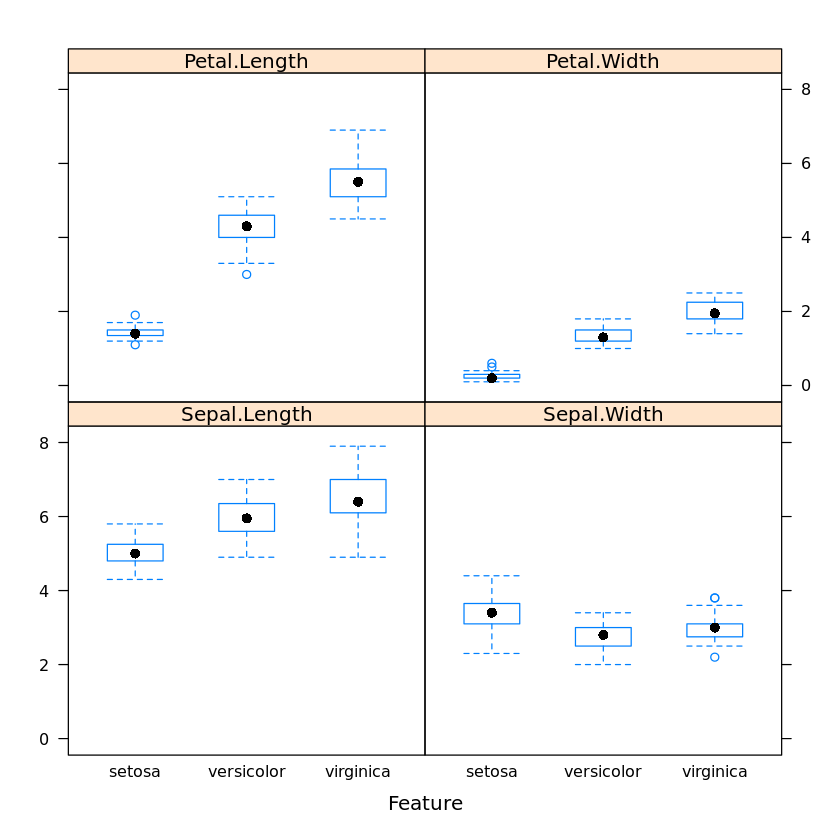

In [19]:
featurePlot(x=x, y=y, plot="box")

### density plots for each attribute by class value

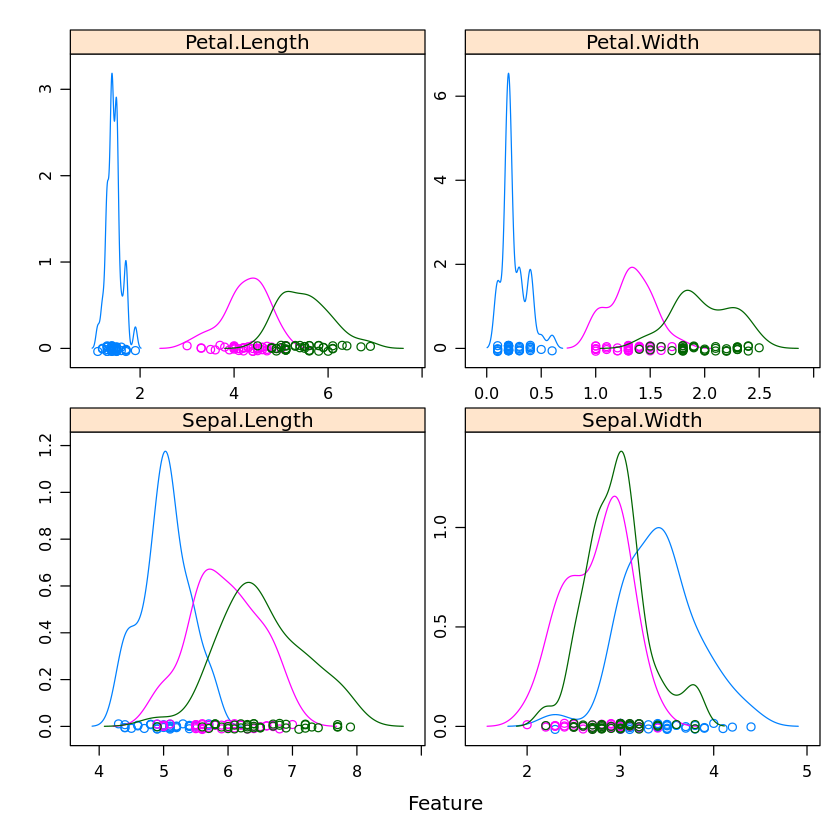

In [20]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## Evaluate Some Algorithms

### Run algorithms using 10-fold cross validation

In [21]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### Building models

### a) linear algorithms

In [22]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

### b) nonlinear algorithms

### CART

In [23]:
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

### kNN

In [24]:
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

### c) advanced algorithms

### SVM

In [25]:
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

### Random Forest

In [26]:
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

### Selecting best model

### summarize accuracy of models

In [27]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
cart 0.8333333 0.9166667 0.9166667 0.9250000 0.9166667    1    0
knn  0.8333333 0.9166667 1.0000000 0.9583333 1.0000000    1    0
svm  0.8333333 0.9166667 0.9583333 0.9500000 1.0000000    1    0
rf   0.9166667 0.9166667 0.9166667 0.9500000 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875   1.000 1.0000 0.9750   1.000    1    0
cart 0.750   0.875 0.8750 0.8875   0.875    1    0
knn  0.750   0.875 1.0000 0.9375   1.000    1    0
svm  0.750   0.875 0.9375 0.9250   1.000    1    0
rf   0.875   0.875 0.8750 0.9250   1.000    1    0


### compare accuracy of models

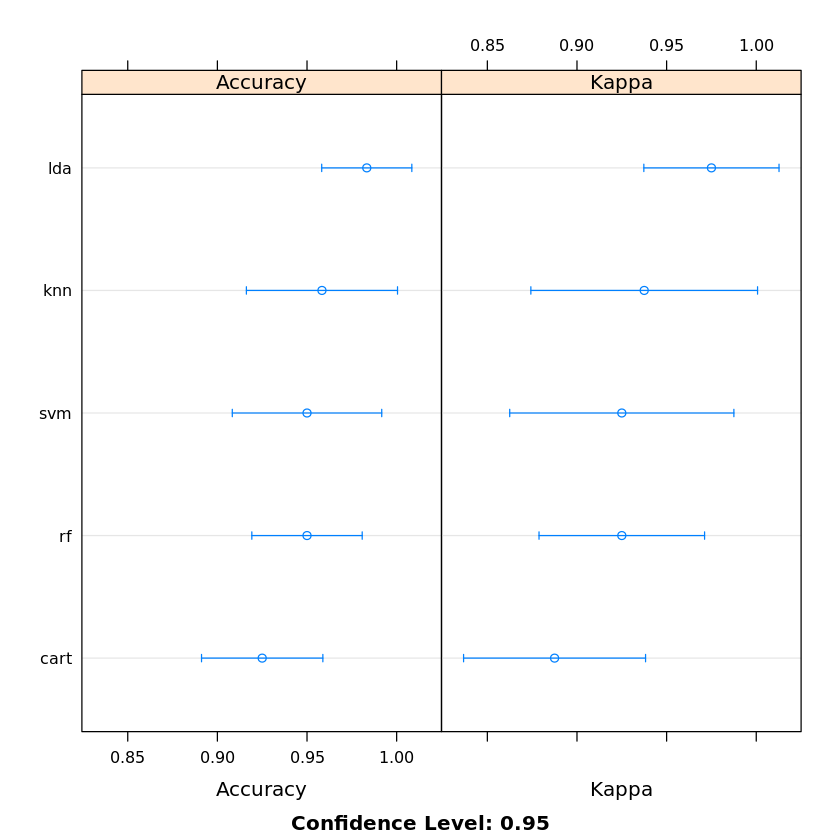

In [28]:
dotplot(results)

### Results for just the LDA

In [29]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



### Making Predictions

### estimate skill of LDA on the validation dataset

In [32]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            